# Trabajo Pr√°ctico 1  
 
####Grupo 1:


| Nombre  | Padr√≥n |
| ------------- | ------------- |
| Alvarez Ernesto Severino | 102221  |
| Feij√≥o Sof√≠a  | 101148  |
| Milhas Facundo  | 102727 |
| Reinaudo Dante  | 102848  |


####Tema 1:
- Generador de n√∫meros al azar asignado: **Mersenne Twister**






# Ejercicio 1 - Algoritmo

Sobre el generador de n√∫meros al azar propuesto en el paper asignado, se pide:
* Implementarlo en funci√≥n de lo especificado en el documento.
* Modificarlo (si aplica) para obtener n√∫meros al azar entre 0 y 1
* Realizar los gr√°ficos que se consideren adecuados para mostrar las distribuciones de n√∫meros al azar
generados en ambos casos (explicar que se busca interpretar con cada uno)

## Implementaci√≥n

Lo primero que hay que definir son las constantes, estas tienen que ser numeros especificos que en su conjunto cumplen con una serie de propiedades. Utilizaremos las constantes del MT19937 para esta prueba, que genera con un rango entre 0 y 2^32 numeros pseudo-aleatorios.

In [ ]:
n = 624
m = 397
r = 31
f = 1812433253
a = 0x9908B0DF
w = 32
u = 11
s = 7
b = 0x9D2C5680
t = 15
c = 0xEFC60000
l = 18
d = 0xFFFFFFFF
w_mask = pow(2, w) - 1

In [ ]:
import sys
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
MT = [0 for i in range(n)]
index = n + 1
lower_mask = (1 << r) - 1
upper_mask = (~lower_mask) & w_mask

Generamos la ***palabra*** (MT) que se utiliza de *semilla* para el generador

In [ ]:
# Seed
def set_seed(seed):
  global index
  global MT
  index = n
  MT[0] = seed
  for i in range(1, n):
    MT[i] = (f * (MT[i - 1] ^ (MT[i - 1] >> (w - 2))) + i) & w_mask

set_seed(0)


Cada vez que llamamos a la funcion *twist* estamos generando los siguiente n valores de la serie X_i

In [ ]:
def twist():
  global index
  global MT
  for i in range(n):
    x = (MT[i] & upper_mask) | (MT[(i + 1) % n] & lower_mask) 
    xA = x >> 1
    if x % 2 != 0:
      xA = xA^a  
    MT[i] = MT[(i + m) % n]^xA
  index = 0

Y por √∫ltimo el generador de numeros aleatorios que utiliza la posicion del *indice actual* en la palabra MT para generar el n√∫mero

In [ ]:

def random_number():
  global index
  global MT
  if index == n: twist()
  y = MT[index]
  y = y ^ ((y >> u) & d)
  y = y ^ ((y << s) & b)
  y = y ^ ((y << t) & c)
  y = y ^ (y >> l)

  index += 1
  return y & w_mask


random_number()


2357136044

Genera numeros entre 0 y 2^w - 1. 

## Probando el generador

In [ ]:
from matplotlib import pyplot as plt

Primero probamos una generaci√≥n de 2^10 (1024) numeros al azar.

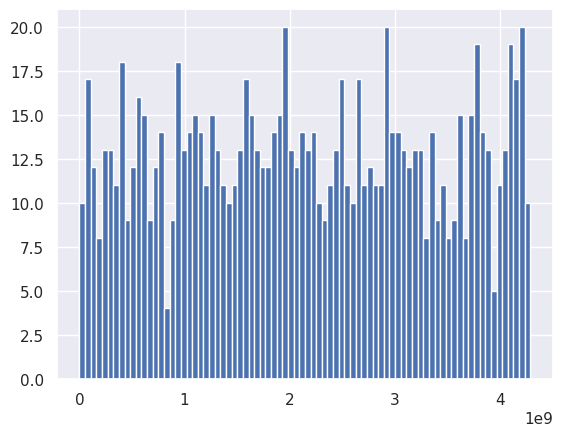

In [ ]:
resultado = [random_number() for i in range(pow(2, 10))]

plt.hist(resultado, 80)

plt.show()

Y vemos que no pareciera ser muy equiproblable la generaci√≥n, aunque si se prueba varias veces con distintas semillas el histograma muta sus picos y valles

 La apariencia de la gr√°fica sugiere que los n√∫meros generados se distribuyen de manera uniforme y aleatoria, lo que es un buen indicador de que el algoritmo est√° funcionando correctamente.
 
 El eje x muestra el √≠ndice del n√∫mero generado y el eje y muestra el valor del n√∫mero generado. Parece haber una gran cantidad de valores peque√±os generados, pero tambi√©n hay valores m√°s grandes que est√°n bien distribuidos. Adem√°s, no parece haber patrones discernibles en los n√∫meros generados, lo que indica que el algoritmo es altamente aleatorio y no est√° sesgado hacia ning√∫n conjunto particular de n√∫meros.

En general, la distribuci√≥n uniforme de los n√∫meros generados sugiere que el Mersenne Twister es un algoritmo s√≥lido y fiable para generar n√∫meros pseudoaleatorios.

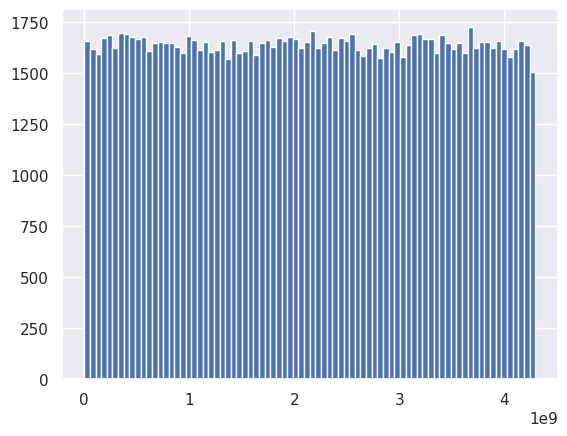

In [ ]:
resultado = [random_number() for i in range(pow(2, 17))]
plt.hist(resultado, 80)

plt.show()

Observamos que a medida que generamos mayores cantidades de valores pseudoaleatorios, la distribuci√≥n tiende a ser equiprobable

## Hacerlo entre 0 y 1

Ahora lo que nos falta es que el rango del generador sea entre 0 y 1. Esto es sencillo, ya que genera, inicialmente, numeros entre 0 y 2^w (2^32 por estar utilizando MT19937). Lo √∫nico que hace falta entonces es dividir el numero generado por 2^w y eso hace que el generador se reduzca al universo de numeros entre 0 y 1


In [ ]:

def generador_01():
  return random_number() / (pow(2, w) - 1)


In [ ]:
resultado = [generador_01() for i in range(pow(2, 17))]

In [ ]:
resultado = [generador_01() for i in range(pow(2, 10))]

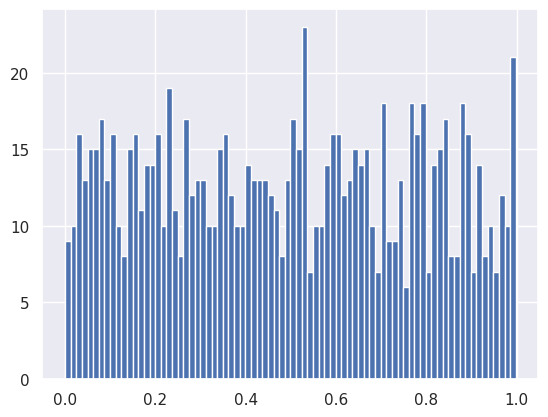

In [ ]:
plt.hist(resultado, 80)

plt.show()

In [ ]:
sum(resultado) / len(resultado)

0.4930176026211602

Con esta √∫ltima cuenta corroboramos que la media sea aproximadamente 0.5, que es la que tiene una distribuci√≥n equiprobable entre 0 y 1

# Ejercicio 2 - Tests
Para los generadores implementados en el ejercicio 1:
* Proponer, y realizar, al menos 3 tests para evaluar su comportamiento.
* Evaluar e interpretar los resultados de cada test para distintos tama√±os de muestras.

Antes de comenzar con los tests, separamos muestras de distintos tama√±os de n√∫meros generados por nuestra implementaci√≥n del generador. A partir estas muestras trabajaremos con los tests.

La primera muestra solo tendr√° 32 elementos, la segunda 128 y la tercera 1024.

In [ ]:
muestra1 = [generador_01() for i in range(pow(2, 5))]
muestra2 = [generador_01() for i in range(pow(2, 7))]
muestra3 = [generador_01() for i in range(pow(2, 10))]

## Test espectral

El primer test que realizaremos es de tipo espectral. Con las tres muestras generadas generamos un scatter plot para verificar que no se forman patrones dentro en el gr√°fico, que indicar√≠an que los datos de la muestra est√°n relacionados (y por ende no son totalmente random).

Para realizar el gr√°fico se toman todos los n√∫meros de la muestra de a pares.  

In [ ]:
def scatter_plot(muestra):
  length = len(muestra)
  n_obs = muestra[:length - 1]
  n_plus_1_obs = muestra[1:length]

  sns_scat=sns.scatterplot(x=n_obs, y=n_plus_1_obs).set(xlabel='n observaciones', ylabel='n+1 observaciones')    
  plt.title('Test espectral - Distribuci√≥n uniforme')
  plt.show()

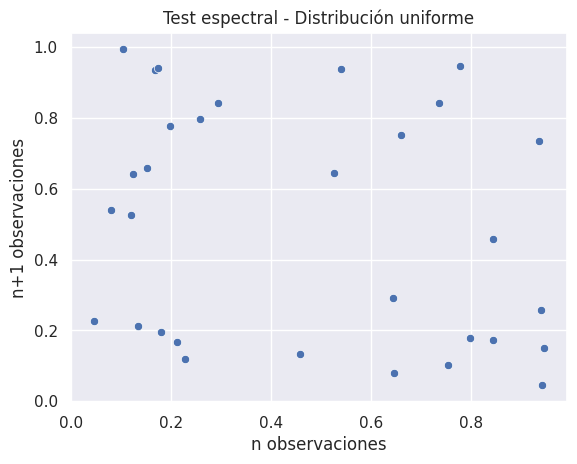

In [ ]:
scatter_plot(muestra1)

Para la primera muestra, la m√°s peque√±a, pareciera darnos un primer indicio de que los pares de n√∫meros generados no siguen ning√∫n patr√≥n. 

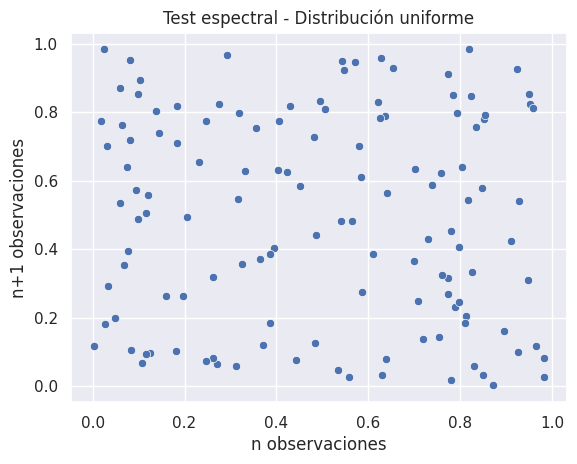

In [ ]:
scatter_plot(muestra2)

Con la segunda muestra, de mayor tama√±o, observamos lo mismo: una nube de puntos.

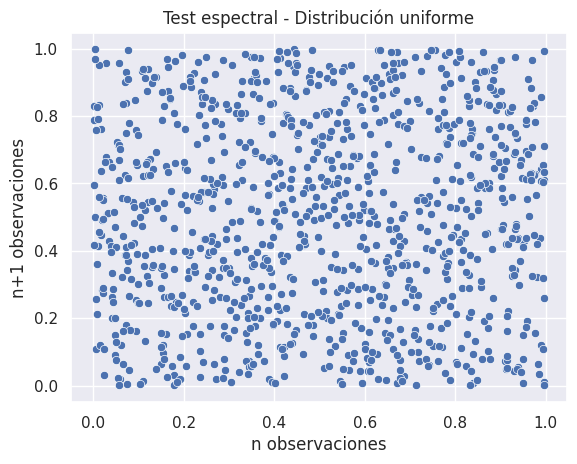

In [ ]:
scatter_plot(muestra3)

Ya viendo la tercer muestra podemos estar m√°s cerca de afirmar que los puntos est√°n distribuidos en el espacio uniformemente. 

Tambi√©n podemos hacer un gr√°fico en 3 dimensiones armando ternas entre los puntos de la muestra para asegurarnos de que agregando otra dimensi√≥n siga sin haber una patr√≥n observable entre los n√∫meros que pueda implicar una relaci√≥n entre ellos.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def scatter_plot_3d(muestra):
  length = len(muestra)
  x = muestra[:length - 2]
  y = muestra[1:length - 1]
  z = muestra[2:length]

  ax = plt.subplot(111, projection='3d')
  ax.scatter(x, y, z, s=0.5)
  plt.title('Test espectral - Distribuci√≥n uniforme')
  plt.show()

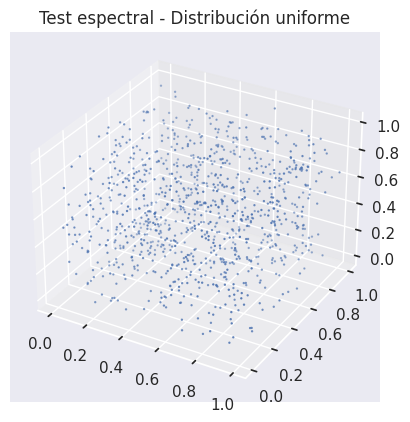

In [ ]:
scatter_plot_3d(muestra3)

Los resultados en 3 dimensiones son los mismos que los hayados en 2 dimensiones. 

## Test Kolmogorov-Smirnov

In [ ]:
from scipy.stats import kstest

El test de Kolmogorov-Smirnov analiza cuan alejada est√° una funci√≥n de probabilidad de otra.

Con un nivel de significancia a = 0,05 vamos a comparar la probabilidad acumulada de una distribuci√≥n uniforme contra la generada. La hip√≥tesis nula ser√° justamente que la probabilidad acumulada de la muestra se distribuye de manera uniforme. 

In [ ]:
def kolmogorov_smirnov(muestra):
    estadistico, pvalue = kstest(muestra, 'uniform')
    print("Estadistico = %f, p-value = %f" % (estadistico, pvalue))

    if pvalue < 0.05:
        print("Se rechaza la hip√≥tesis nula")
    else:
        print("Se acepta la hip√≥tesis nula")

In [ ]:
def plot_ks(muestra):
    plt.figure()
    sns.ecdfplot(data=muestra, label='Uniforme')
    uniform_data = np.linspace(0,1,len(muestra))
    plt.plot(np.sort(uniform_data), np.linspace(0, 1, len(uniform_data), endpoint=False), color='r', label='Emp√≠rica')

    plt.legend(title="Funciones")
    plt.ylabel("F(x)")
    plt.xlabel("x")
    plt.show()

Entonces aplicamos el test a las 3 muestras de n√∫meros que tenemos. Tambi√©n graficamos la funci√≥n de distribuci√≥n acumulada de una uniforme en (0,1) vs la distribuci√≥n acumulada empirica que se est√° analizando. 
Esperamos aceptar la hip√≥tesis nula y observar un gr√°fico donde la distancia entre la funci√≥n de distribuci√≥n de emp√≠rica se encuentra a poca distancia de la funci√≥n uniforme. Idealmente se deber√≠a formar una √∫nica l√≠nea (la roja y la azul superpuestas), lo que significar√≠a que ambas distribuciones son id√©nticas.

Estadistico = 0.181148, p-value = 0.216461
Se acepta la hip√≥tesis nula


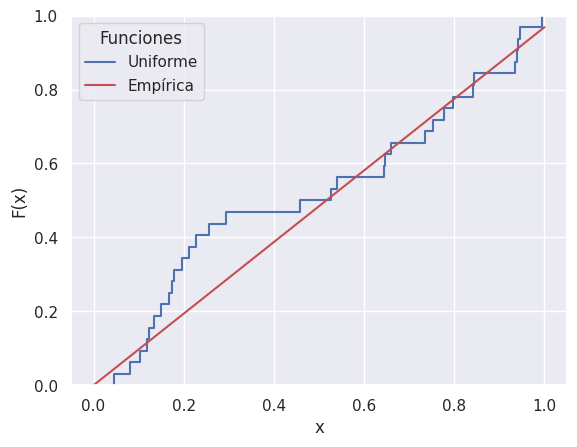

In [ ]:
kolmogorov_smirnov(muestra1)
plot_ks(muestra1)

Estadistico = 0.070014, p-value = 0.533810
Se acepta la hip√≥tesis nula


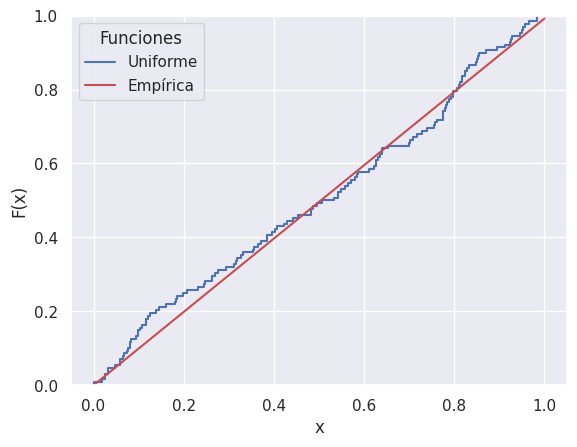

In [ ]:
kolmogorov_smirnov(muestra2)
plot_ks(muestra2)

Estadistico = 0.017770, p-value = 0.897026
Se acepta la hip√≥tesis nula


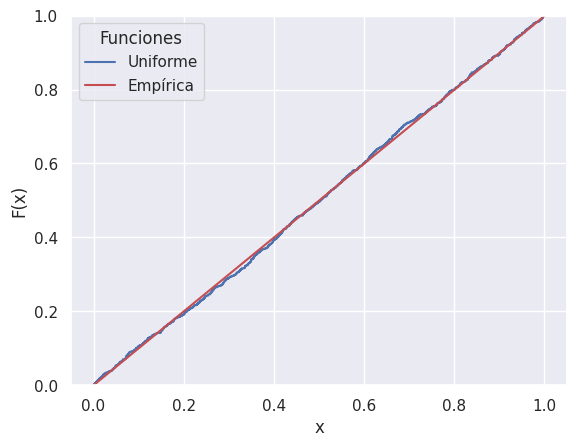

In [ ]:
kolmogorov_smirnov(muestra3)
plot_ks(muestra3)

Podemos observar que para todos los tama√±os de muestra se acepta la hip√≥tesis nula. En particular, a medida que el tama√±o de la muestra crece podemos ver c√≥mo tiende a comportarse como una uniforme, ya que vemos como decrece la distancia entre ambas funciones en el gr√°fico.


## Test QQ Plot

In [ ]:
import statsmodels.api as sm
from scipy.stats import distributions

Por √∫ltimo realizamos un test QQ plot, que grafica contrastes entre cuantiles. Para esto generamos un gr√°fico en el cual un eje es la muestra a analizar y el otro es la variable distribuida de manera uniforme, ya que espero que mis muestras sigan esa distribuci√≥n.

El resultado esperado es que los puntos del gr√°fico se encuentren sobre la recta roja, que representa la distribuci√≥n te√≥rica de los puntos.

In [ ]:
def plot_qq(muestra):
    sm.qqplot(data=np.array(muestra), dist=distributions.uniform, line ='45')
    
    plt.title('QQ Plot')
    plt.show()

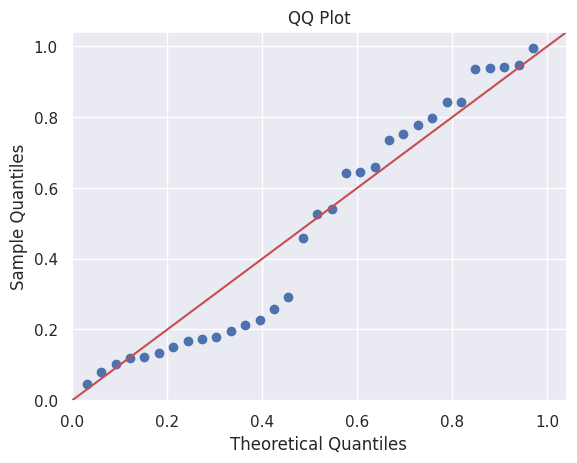

In [ ]:
plot_qq(muestra1)

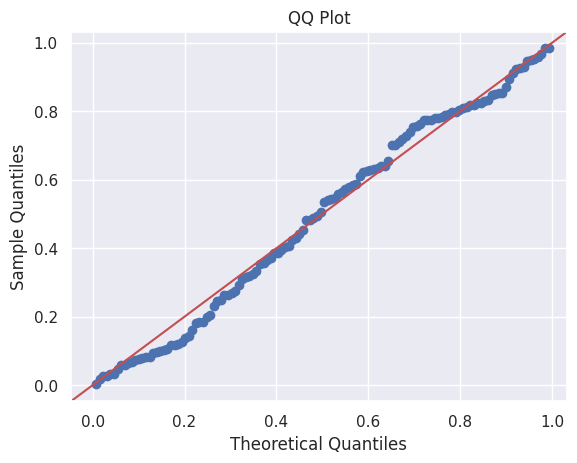

In [ ]:
plot_qq(muestra2)

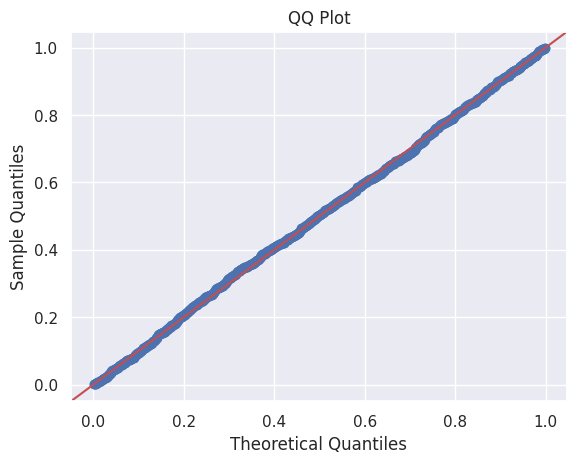

In [ ]:
plot_qq(muestra3)

Podemos observar que a medida que crece el tama√±o de la muestra, la distribuci√≥n emp√≠rica se asemeja cada vez m√°s a la uniforme. 

# Ejercicio 3

Utilizando el generador implementado en el ejercicio 1:
* Implementar un m√©todo para generar variables aleatorias con distribuci√≥n Normal con media 10, y desv√≠o est√°ndar 2.
* Graficar la distribuci√≥n que siguen los n√∫meros pseudoaleatorios generados.
* Realizar, al menos 2 tests, de los explicados en la materia, para verificar si los n√∫meros generados siguen la distribuci√≥n pedida (evalue los resultados para distintos tama√±os de muestra).

## M√©todo de superposici√≥n



El m√©todo de superposici√≥n se basa en que ciertas variables aleatorias puedan escribirse como la suma de otras variables aleatorias independientes.

Para generar variables aleatorias con distribuci√≥n normal con esperanza (o media) 10 y varianza 4 (o desv√≠o est√°ndar 2) podemos superponer variables con distribuci√≥n uniforme entre dos puntos a y b. 

Sabemos que la esperanza de una variable uniforme entre a y b es 

ùê∏(x) = (a + b) / 2

y la varianza es

ùëâ(x) = (b - a)^2 /12

Tambi√©n sabemos que multiplicando dichas ecuaciones por n obtendr√≠amos la esperanza y varianza de la sumatoria de n variables con distribuci√≥n uniforme. 

Entonces definiendo un n y sabiendo los valores de la esperanza y varianza deseados, podemos obtener a y b. Definimos n = 10 y, haciendo los c√°lculos pertinentes encontramos que 

a = -0.09 

b = 2.18 

Ahora sabiendo que vamos a superponer variables U(-0.09, 2.18), hay que llevar a nuestro generador que es U(0,1) a esa forma. Vamos a generar muestras de n√∫meros que se obtuvieron acumulando en una variable 10 n√∫meros generados aleatoriamente con nuestra implementaci√≥n del mersenne twister (llevados del rango 0 a 1 al rango -0.09 a 2.18). 

Y luego para analizar los n√∫meros obtenidos vamos a graficar histogramas de las muestras.

In [ ]:
def generate_x(n):
    x=0
    for i in range(n):
        x += (generador_01()*2.18 - 0.09) # para pasar de generar (0,1) a generar (a, b)
    return x

def plot(data):
  sns.histplot(data=data,bins=50)
  plt.title('Simulaci√≥n de una variable con distribuci√≥n normal\n', size=16)
  plt.ylabel("Ocurrencias")
  plt.xlabel("Valores generados")
  plt.plot()

Para una muestra de 1000 n√∫meros:

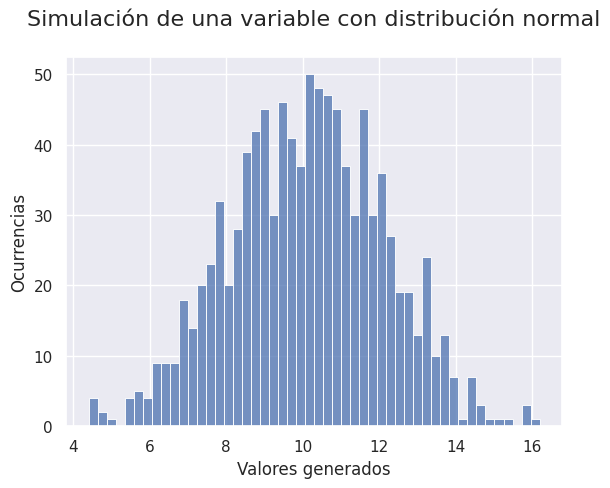

In [ ]:
plot([generate_x(10) for i in range(1000)])

Observamos en el histograma que los valores generados se encuentran entre 4 y 16 aproximadamente, y que la distribuci√≥n de los valores est√° m√°s concentrada entre el 8 y 12. Es decir, pareciera ser que se generan m√°s n√∫meros que se cuentran en el rango entre 8 y 12.
Si lo comparamos con el histograma de una muestra generada a partir de una distribuci√≥n normal, vemos que la tendencia es la misma:


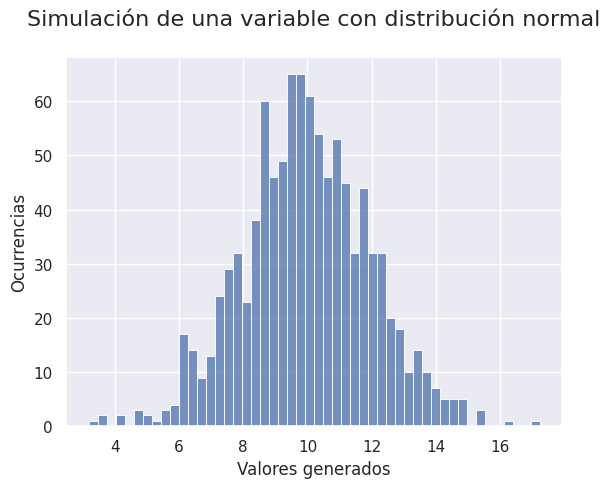

In [ ]:
plot(np.random.normal(10, 2, 1000))

Ahora analizamos qu√© sucede con una muestra de mayor tama√±o. Para n = 10000

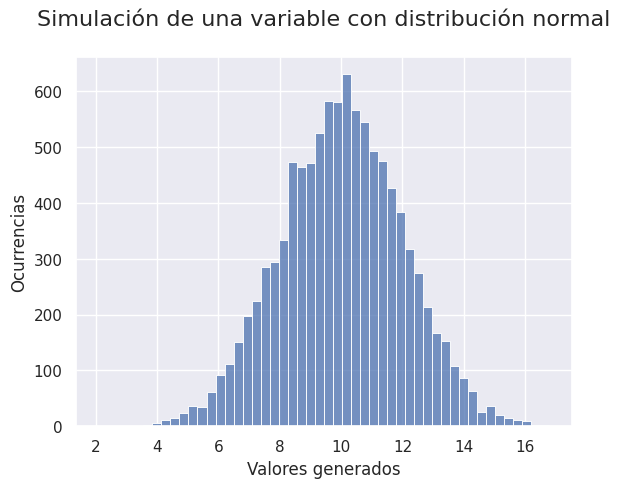

In [ ]:
plot([generate_x(10) for i in range(10000)])

Vemos que si generamos una mayor cantidad de n√∫meros, pareciera ser que crece la tendencia a que los valores se encuentren en un rango entre 9 y 11, lo cual es esperable si buscamos tener una media de 10. 

## Tests

### Shapiro

Como primer test vamos a usar Shapiro-Wilk, test no param√©trico para determinar normalidad. La hip√≥tesis nula ser√° que la muestra sigue una distribuci√≥n normal. 

In [ ]:
from scipy.stats import shapiro

Vamos a comparar los resultados del test para una muestra de tama√±o 1000 con los resultados de una muestra generada a partir de una distribuci√≥n normal. 

In [ ]:
nros_rand_normal = [generate_x(10) for i in range(1000)]

estadist_shapiro, pvalue_shapiro = shapiro(nros_rand_normal)

resultado = "Se rechaza la H0, que sigue una distribuci√≥n normal" if pvalue_shapiro <= 0.05 else "No se puede descartar la H0"
print(resultado)

media = np.mean(nros_rand_normal)
print("La media es aproximadamente %f" % media)

varianza = np.var(nros_rand_normal)
print("La varianza es aproximadamente %f" % varianza)

No se puede descartar la H0
La media es aproximadamente 9.996978
La varianza es aproximadamente 4.023547


In [ ]:
nros_rand_normal = np.random.normal(10, 2, 1000)

estadist_shapiro, pvalue_shapiro = shapiro(nros_rand_normal)

resultado = "Se rechaza la H0, que sigue una distribuci√≥n normal" if pvalue_shapiro <= 0.05 else "No se puede descartar la H0"
print(resultado)

media = np.mean(nros_rand_normal)
print("La media es aproximadamente %f" % media)

varianza = np.var(nros_rand_normal)
print("La varianza es aproximadamente %f" % varianza)

No se puede descartar la H0
La media es aproximadamente 10.054032
La varianza es aproximadamente 3.954972


Podemos ver en primer lugar que en ambos casos la hip√≥tesis de que se tienen una distribuci√≥n normal no puede ser rechazada, lo cual se condice con lo esperado, y en segundo lugar que la media y la varianza obtenidas tambi√©n se acercan mucho a los valores a los cuales quisimos llegar inicialmente (que eran 10 y 4 respectivamente).

Ahora vamos a probar con una muestra de mayor tama√±o. Para n = 10000

In [ ]:
nros_rand_normal = [generate_x(10) for i in range(10000)]

estadist_shapiro, pvalue_shapiro = shapiro(nros_rand_normal)

resultado = "Se rechaza la H0, que sigue una distribuci√≥n normal" if pvalue_shapiro <= 0.05 else "No se puede descartar la H0"
print(resultado)

media = np.mean(nros_rand_normal)
print("La media es aproximadamente %f" % media)

varianza = np.var(nros_rand_normal)
print("La varianza es aproximadamente %f" % varianza)

Se rechaza la H0, que sigue una distribuci√≥n normal
La media es aproximadamente 9.992537
La varianza es aproximadamente 3.999484


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
nros_rand_normal = np.random.normal(10, 2, 10000)

estadist_shapiro, pvalue_shapiro = shapiro(nros_rand_normal)

resultado = "Se rechaza la H0, que sigue una distribuci√≥n normal" if pvalue_shapiro <= 0.05 else "No se puede descartar la H0"
print(resultado)

media = np.mean(nros_rand_normal)
print("La media es aproximadamente %f" % media)

varianza = np.var(nros_rand_normal)
print("La varianza es aproximadamente %f" % varianza)

No se puede descartar la H0
La media es aproximadamente 9.978037
La varianza es aproximadamente 4.012042


Vemos nuevamente que en ambos casos (muestra aleatoria con nuestro generador y muestra uniforme) los resultados son los esperados: se obtienen media y varianza de aproximadamente 10 y 4 respectivamente, y la hip√≥tesis nula no puede ser rechazada. 

### Kolmogorov Smirnov

In [ ]:
from scipy.stats import kstest
import math

datos_sinteticos = np.random.normal(10,2,1000)
nros_rand_normal = [generate_x(10) for i in range(1000)]

statistic_ks, pvalue_ks= kstest(datos_sinteticos, nros_rand_normal)

print("stat: %f \n pvalue: %f" % (statistic_ks, pvalue_ks))

if pvalue_ks < 0.05:
    print("Se rechaza la hip√≥tesis nula")
else:
    print("Se acepta la hip√≥tesis nula")

stat: 0.034000 
 pvalue: 0.610166
Se acepta la hip√≥tesis nula


#Ejercicio 4 - Kmeans

Los n√∫meros pseudo aleatorios son ampliamente utilizados en algoritmos de Machine Learning.
En este ejercicio se pide, utilizando el generador desarrollado en el primer ejercicio implementar el algoritmo
KMeans, y aplicarlo al dataset entregado junto a este trabajo pr√°ctico.
Pasos del algoritmo:


1. Determinar la cantidad de cluster/grupos a utilizar. Para este caso utilizar 3.
2. Elegir los centroides a utilizar en cada grupo. Estos centroides se inicializan en coordenadas aleatorias.
3. Calcular la distancia de cada punto a cada centroide. Utilizar distancia eucl√≠dea. Agrupar cada observaci√≥n con
aquel centroide m√°s pr√≥ximo
4. Recalcular los centroides de cada grupo como la media de todos los puntos del cluster. Esto significa que se
actualiza la posici√≥n del centroide para reflejar la nueva agrupaci√≥n.
5. Repetir los pasos 3 y 4 hasta que alguno de los criterios de stop se cumplan:

* Los centroides dejan de cambiar. Despu√©s de m√∫ltiples iteraciones, los centroides de cada cl√∫ster no cambian. Por lo que se asume que el algoritmo ha convergido.

* Los puntos dejan de cambiar de cl√∫ster. Cuando se observa que no hay un intercambio de cl√∫sters se
asume que el modelo est√° entrenado.
* L√≠mite de iteraciones. Se fija un n√∫mero m√°ximo de iteraciones que queremos que nuestro algoritmo
ejecute antes de pararlo. Cuando llega a ese n√∫mero se detiene el entrenamiento.

Evaluar el comportamiento del algoritmo utilizando distintos centroides iniciales (utilizando distintos n√∫meros al
azar generados).
Grafique cada observaci√≥n y los grupos generados.

##Observacion del Dataset

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Leo el archivo csv
def get_dataset():
  return pd.read_csv("/content/sample_data/dataset_kmeans_tema1.csv", header=None, names=['x', 'y'])
  
dataset = get_dataset()
dataset


x         y
0     0.844637  1.483692
1     0.256773 -0.193590
2     0.921085  1.657488
3    -0.739796 -0.128695
4     0.239571  1.370132
...        ...       ...
9995  0.977775 -1.502248
9996  1.100656  1.478022
9997  0.173089 -0.477702
9998  0.695110  1.263414
9999 -0.879453 -0.415607

[10000 rows x 2 columns]

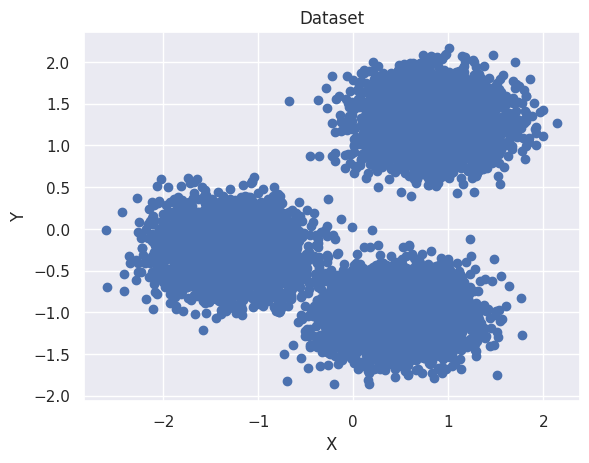

In [ ]:
# plot the dataset
plt.scatter(dataset['x'], dataset['y'])
plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Observando el gr√°fico, es posible asumir que el mismo sugiere que las dos variables pueden estar relacionadas de alguna manera.

Parece haber algun tipo de correlaci√≥n positiva entre los valores de x e y: Cuando aumentan los valores de x, tambi√©n lo hacen los valores de y.

A simple vista, se logran apreciar tres grupos grandes de puntos de datos agrupados en clusters, con algunos valores at√≠picos dispersos.

Los valores de x e y parecen estar acotados, con la mayor√≠a de los puntos de datos dentro de un cierto rango.

Seg√∫n estas observaciones, es posible que los datos representen alg√∫n tipo de medici√≥n o experimento en el que se comparan dos variables. El gran grupo de puntos de datos y el rango acotado sugieren que puede haber alg√∫n tipo de l√≠mite o restricci√≥n en los valores que se miden.

In [ ]:
#Obtengo el rango de coordenadas del dataset... 
max_x = dataset['x'].max()
min_x = dataset['x'].min()

max_y = dataset['y'].max()
min_y = dataset['y'].min()


# Imprimo los valores m√°ximos de cada columna
print("El valor m√°ximo en la columna 'x' es:", max_x)
print("El valor m√≠nimo en la columna 'x' es:", min_x)

print("El valor m√°ximo en la columna 'y' es:", max_y)
print("El valor m√≠nimo en la columna 'y' es:", min_y)

El valor m√°ximo en la columna 'x' es: 2.146191799005762
El valor m√≠nimo en la columna 'x' es: -2.600406140530271
El valor m√°ximo en la columna 'y' es: 2.1636166365073644
El valor m√≠nimo en la columna 'y' es: -1.8652716871113888


##Implementacion del Algoritmo KMeans

###Generaci√≥n de los centroides iniciales

El enunciado aclara que "los centroides se inicializan en coordenadas aleatorias" utilizando el generador desarrollado en el primer ejercicio (Merssene Twister) al implementar el algoritmo KMeans.

La funcion Sample de Pandas devuelve una muestra aleatoria de elementos del dataset que se le provee, al brindarle una semilla generada por el generador de n√∫meros aleatorios del ejercicio 1.

Esta "semilla aleatoria" es un n√∫mero inicial utilizado para generar secuencias de n√∫meros aleatorios (en este caso la eleccion de los centroides) y es importante para asegurar la aleatoriedad y la reproducibilidad en aplicaciones de aprendizaje autom√°tico como lo es Kmeans.

In [ ]:

seed = random_number()

#Inicializo los centroides aleatoriamente. n es la cantidad de muestras (coordeandas, centroides) a devolver.
#Esta cantidad de centroides a generar es la misma que la cantidad de clusters a encontrar.

centroides = dataset.sample(n=3, random_state=seed)

###Ejecucion

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Clusters KMeans')

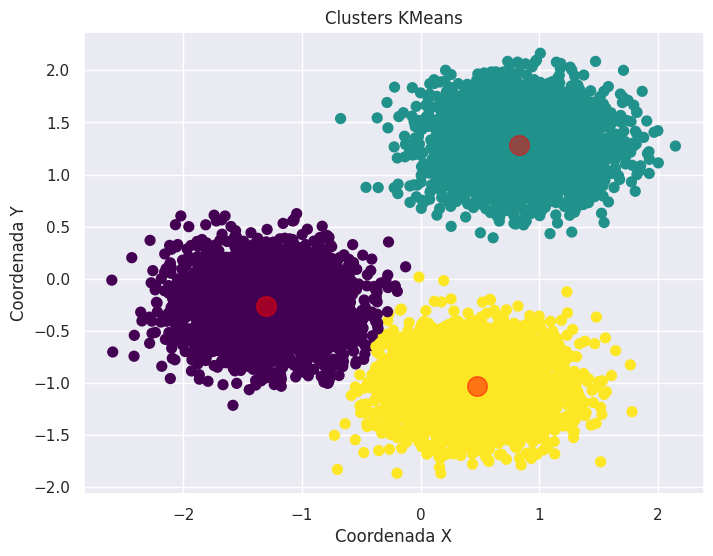

In [ ]:
#Ejecuto el algoritmo KMeans
#KMeans conoce la generaci√≥n de n√∫meros aleatorios para la inicializaci√≥n de los centroides.
#aleatoriedad determinista para que tenga reproducibilidad(?
kmeans = KMeans(n_clusters=3, init=centroides, max_iter=100)

#kmeans.fit(dataset[['x', 'y']])
kmeans.fit(dataset)

# Centroides finales
centroides_finales = kmeans.cluster_centers_

# #Etiquetas de los clusters
labels = kmeans.labels_

# #y_kmeans = kmeans.predict(dataset)
fig, ax = plt.subplots(figsize=(8, 6))

# # Grafica los puntos del dataset
ax.scatter(dataset['x'], dataset['y'], c=labels, s=50, cmap='viridis')

# # Grafica los centroides
ax.scatter(centroides_finales[:, 0], centroides_finales[:, 1], c='red', s=200, alpha=0.5)


# # Configura los ejes y los t√≠tulos
ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
ax.set_title('Clusters KMeans')


El gr√°fico muestra el resultado del algoritmo de K-Means con 3 clusters y 3 centroides iniciales aleatorios en 100 iteraciones.

Cada color indica el cluster al que fue asignado cada dato del dataset. Los centroides finales quedan indicados en rojo.

En el gr√°fico se pueden observar los tres clusters de los que hablamos antes, bien identificados por el algoritmo. Cada cluster est√° compuesto por puntos del dataset que est√°n m√°s cercanos entre s√≠. Los centroides finales se encuentran en el centro de los puntos asignados a ese cluster.

Podemos decir que el algoritmo de K-Means parece haber separado adecuadamente los datos en tres clusters. 

De todas formas, los centroides iniciales aleatorios pueden haber afectado la posici√≥n final de los centroides finales en los clusters.

###Evaluaci√≥n del Algoritmo
Evaluar el comportamiento utilizando distintos centroides iniciales (utilizando distintos n√∫meros al azar generados).

In [ ]:
#Definicion de funciones para su evaluacion
cant_clusters = 3
cant_iteraciones = 100
def correr_kmeans(seed):
    # Inicializa los centroides aleatoriamente
    centroides = dataset.sample(n=cant_clusters, random_state=seed)

    # Ejecuta el algoritmo KMeans
    kmeans = KMeans(n_clusters=cant_clusters, init=centroides, max_iter=cant_iteraciones)
                    #, random_state=seed)
    kmeans.fit(dataset[['x', 'y']])

    # Retorna los centroides finales y las etiquetas de los clusters
    return kmeans.cluster_centers_, kmeans.labels_

def plot_clusters(centroides, labels):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Grafica los puntos del dataset
    ax.scatter(dataset['x'], dataset['y'], c=labels, s=50, cmap='viridis')

    # Grafica los centroides
    ax.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.5)

    # Configura los ejes y los t√≠tulos
    ax.set_xlabel('Coordenada X')
    ax.set_ylabel('Coordenada Y')
    ax.set_title('Clusters KMeans')

Semilla obtenida: 2610097493


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


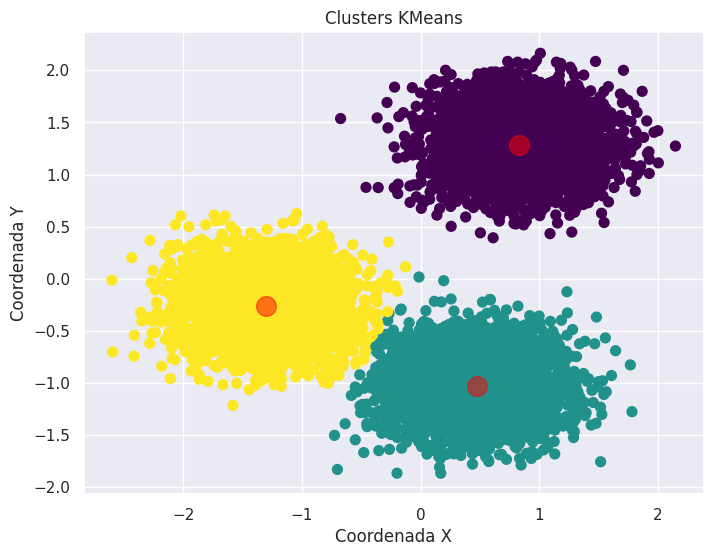

Semilla obtenida: 417765029


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


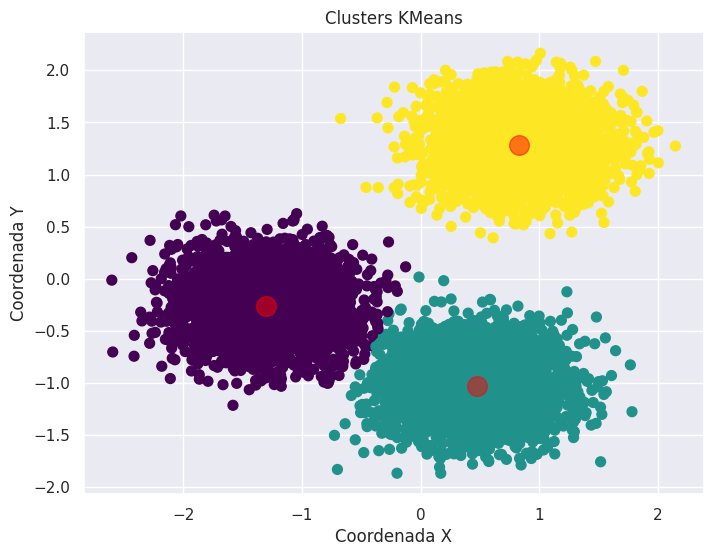

Semilla obtenida: 3856992420


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


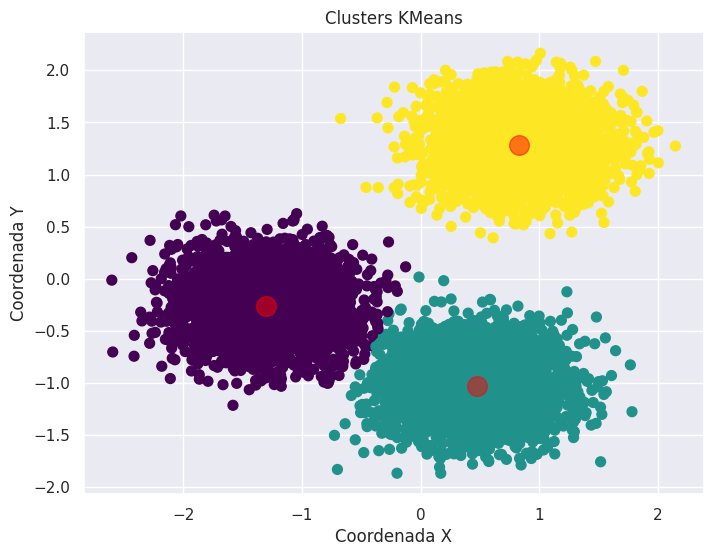

Semilla obtenida: 1932758526


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


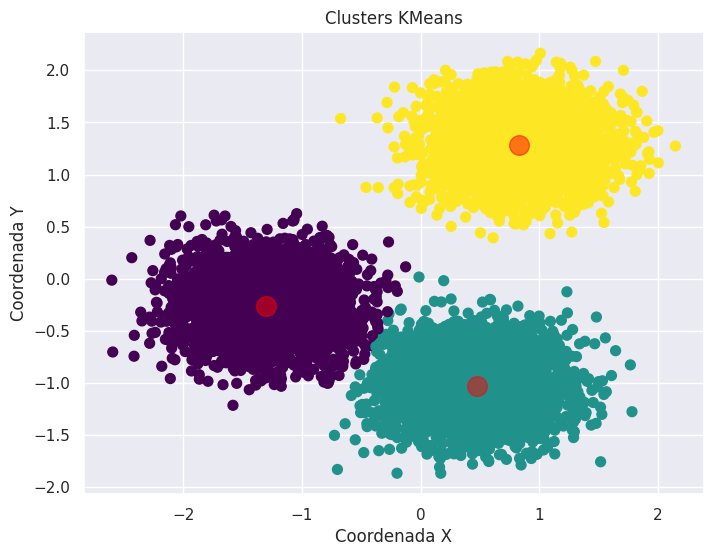

Semilla obtenida: 2685749530


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


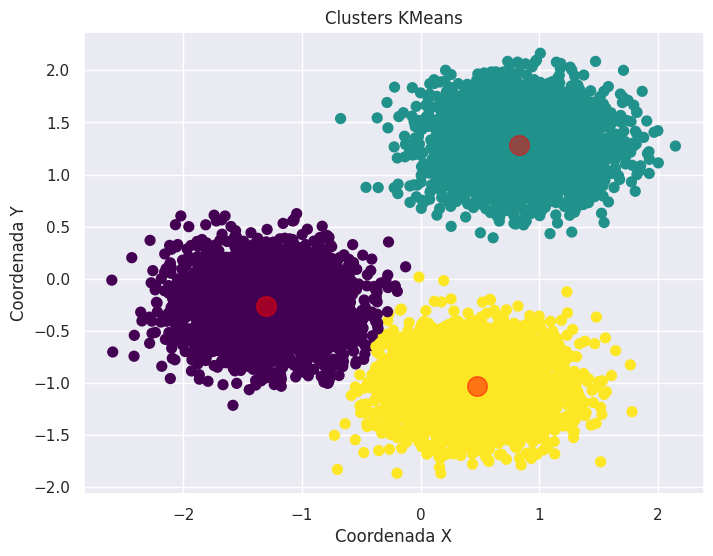

In [ ]:
for i in range(5):
  seed = random_number()
  print("Semilla obtenida:", seed)

  # Ejecuto el algoritmo KMeans
  centroides_finales, labels = correr_kmeans(seed)

  # Plotea los clusters obtenidos
  plot_clusters(centroides_finales, labels)
  plt.show()

En las distintas ejecuciones del algoritmo, podemos observar como en la mayoria de los casos, dado k=3 y 100 iteraciones, el mismo clasifica correctamente los clusters.

De todas formas, en un caso particular, el gr√°fico n√∫mero 3 con semilla numero 2852462576 (utilizar para reproducibilidad), se logra apreciar como los centroides iniciales aleatorios parecen haber afectado la posici√≥n final de los centroides finales en los clusters.

#Ejercicio 5

Un uso com√∫n de los sat√©lites es la captura de im√°genes, como se expone
en el trabajo ‚ÄúPerformance Modelling of Imaging Service of Earth
Observation Satellites with Two-dimensional Markov Chain‚Äù de Wen Chen,
Stephen Mackin, y Phil Palmer.

Utilizando el generador del ejercicio 1, y los datasets provistos junto a este
enunciado, se pide:

* Reproducir la generaci√≥n de localizaciones de im√°genes al azar,
mostrada en la figura 5: ‚ÄúDistribution of targets over the globe‚Äù de la
secci√≥n 4. Resultados. En este caso las im√°genes se generan de
forma uniformemente distribuida dentro de los par√°metros de
latitud y longitud [‚àí60‚ó¶,60‚ó¶] [‚àí150‚ó¶, 150‚ó¶] , respectivamente.

* Modificar el m√©todo para s√≥lo generar localizaciones de im√°genes
dentro del continente australiano (figuras 22 y 23 del dataset). De
aplicar, en funci√≥n del m√©todo elegido, calcular el factor de rendimiento de forma emp√≠rica.

Para resolver este ejercicio utilizaremos la libreria geopandas para poder trabajar con el dataset otorgado. A continuacion procedemos a instalar dicha libreria.

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 54.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.1/16.1 MB 56.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 83.7 MB/s eta 0:00:00


In [ ]:
# Realizamos los imports necesarios para resolver esta seccion.
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
# Cargamos los archivos del dataset provistos
uploaded = files.upload()

In [ ]:
uploaded = files.upload()

In [ ]:
# Leemos el archivo y lo cargamos en un dataset para poder trabajar con el.
df = gpd.read_file('WB_Coastlines_10m.shp')
df

## Punto A


In [ ]:
# Graficamos el  dataset para observar su contenido. Vemos que se trata de el mapa de la tierra.
df.plot(color="crimson",linewidth= 1, figsize = (15,15))

In [ ]:
# L√≠mites de latitud y longitud pedidos en este ejercicio
lat_min, lat_max = -60, 60
lon_min, lon_max = -150, 150

In [ ]:
# N√∫mero de puntos a generar
n_points = 1000

latitudes= []
longitudes = []

# Generamos una cierta cantidad de puntos pseudoaleatorios con nuestro generador y acotandolo al rango establecido
for i in range(0,n_points):
  latitudes.append( generador_01() * (lat_max-lat_min) + lat_min)
  longitudes.append( generador_01() * (lon_max-lon_min) + lon_min)



In [ ]:
points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(longitudes, latitudes))

In [ ]:
# Graficamos los puntos y los l√≠mites geogr√°ficos
ax = df.plot(color="black",linewidth= 1, figsize = (15,15))
ax.set_facecolor('lavender')
points.plot(ax=ax, markersize=5, color='red')
plt.show()

##Punto B


Para resolver este ejercicio generaremos puntos uniformemente distribuidos entre los parametros de latitud y longitud  [-40,-10] , [110,155] , respectivamente.


In [ ]:
df.loc[22:23,"geometry"].plot(color="orange",linewidth= 1, figsize = (15,15))

In [ ]:
# L√≠mites de latitud y longitud
aust_lat_min, aust_lat_max = -40, -10
aust_lon_min, aust_lon_max = 110, 155

In [ ]:
# N√∫mero de puntos a generar
n_points = 1000

latitudes_australia = []
longitudes_australia = []

for i in range(0,n_points):
  latitudes_australia.append( generador_01() * (aust_lat_max-aust_lat_min) + aust_lat_min)
  longitudes_australia.append( generador_01() * (aust_lon_max-aust_lon_min) + aust_lon_min)

In [ ]:
from shapely import wkt
from shapely.geometry import Point, Polygon

In [ ]:
coordenadas = list(df.loc[22,"geometry"].coords) + list(df.loc[23,"geometry"].coords)
australia = Polygon(coordenadas)
x,y = australia.exterior.xy

In [ ]:

latitudes_validas=[]
longitudes_validas=[]

for i in range(0,n_points):
  if australia.contains(Point((longitudes_australia[i],latitudes_australia[i]))):
    latitudes_validas.append(latitudes_australia[i])
    longitudes_validas.append(longitudes_australia[i])


In [ ]:
australian_points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(longitudes_validas, latitudes_validas))

In [ ]:
# Graficar los puntos y los l√≠mites geogr√°ficos
ax = df.loc[22:23,"geometry"].plot(color="orange",linewidth= 1, figsize = (10,10))
australian_points.plot(ax=ax, markersize=5, color='red')
plt.show()

In [ ]:
# Factor de rendimiento:

factor_rendimiento = len(longitudes_validas) / n_points

factor_rendimiento